## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Firstly....
  To understand the problem and analysing it,first we have to look into dataset. Dataset shows how data has been represented in columns and rows, so whenever we create variable we can use those column and data for analysis.

#DATA PREPARATION AND CLEANING

IMPORTING LIBRARIES:

In [1]:
# Import Pandas Package
# Import Numpy Package
# Import matplotlib
# Import seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import mean,median
from itertools import count
from nltk.util import pr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Dataset as a pandas_dataframe

In [5]:
# loading Play Store Data csv file
play_store_data_path = '/content/drive/My Drive/csv files/Play Store Data.csv'
df = pd.read_csv(play_store_data_path)

In [7]:
#loading user reviews csv file
user_reviews_path = '/content/drive/My Drive/csv files/User Reviews.csv'
review_path = pd.read_csv(user_reviews_path)

In [8]:
apps = review_path.dropna()
apps = apps.drop_duplicates()
print(len(apps))

29692


Before starting exploration,we have to first look at the structure and the manner in which the data is organized

# Description of data given

In [9]:
#showing first 6 values
df.head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [10]:
ps_data = df.copy()
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
#Finding data type of each column
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
#list of columns
list(ps_data.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [13]:
#Find out the size of play store data 
ps_data.shape

(10841, 13)

In [14]:
ps_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Data Cleaning

In [15]:
# Drop NaNs and duplicates in the dataframe
apps = df.dropna()
apps = apps.drop_duplicates()
print(len(apps))

# Remove unwanted characters
chars = ['$', '+', ',']
cols = ['Installs','Price']

for col in cols:
  for char in chars:
    apps[col] = apps[col].astype(str).str.replace(char,'')

  # Convert columns to numeric data type
  apps[col] = pd.to_numeric(apps[col])

# Change the size of Apps from KB to MB
apps['Size'] = apps['Size'].astype(str).str.replace('M','')
apps['Size'] = apps['Size'].astype(str).str.replace('k','e-3')

# Change the size 'Varies with device' to average app size as reported by Google
apps['Size'] = apps['Size'].astype(str).str.replace('Varies with device','11.5')

apps['Size'] = pd.to_numeric(apps['Size'])

8886


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if sys.path[0] == '':


In [16]:
#Convert the 'Last Updated' column to Datetime object
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

apps.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8288,McClatchy DC Bureau,NEWS_AND_MAGAZINES,4.3,80,8.700,5000,Free,0.0,Everyone 10+,News & Magazines,2018-06-18,6.0.1,4.4W and up
6410,BL Driver,MAPS_AND_NAVIGATION,3.9,230,12.000,10000,Free,0.0,Everyone,Maps & Navigation,2018-07-13,2.12.1,4.1 and up
1998,Stick War: Legacy,GAME,4.6,811040,77.000,10000000,Free,0.0,Teen,Strategy,2018-05-10,1.7.04,4.4 and up
1979,Bubble Shooter 2,GAME,4.3,23043,11.500,5000000,Free,0.0,Everyone,Arcade,2018-07-25,3.5,4.1 and up
7069,Restaurantführer Südbaden,TRAVEL_AND_LOCAL,4.1,46,12.000,1000,Free,0.0,Everyone,Travel & Local,2017-01-11,2.0.0,4.0 and up
2671,"Horn, free country requirements",SHOPPING,4.5,37186,7.900,1000000,Free,0.0,Everyone,Shopping,2018-06-30,3.4.5,4.0 and up
6288,Hot or Not - Find someone right now,DATING,4.1,305737,11.500,10000000,Free,0.0,Mature 17+,Dating,2018-08-02,Varies with device,Varies with device
6650,Bar-B-Q Recipes,FOOD_AND_DRINK,4.8,18,3.500,5000,Free,0.0,Everyone,Food & Drink,2016-08-15,1.0,4.0 and up
923,"Hulu: Stream TV, Movies & more",ENTERTAINMENT,4.0,319692,11.500,10000000,Free,0.0,Teen,Entertainment,2018-08-03,Varies with device,5.0 and up
8601,DN Calculators,FINANCE,5.0,12,0.775,100,Free,0.0,Everyone,Finance,2013-09-05,1.11,3.0 and up


# DATA EXPLORATION AND VISUALIZATION

In [17]:
#print unique apps categories
Categories =apps['Category'].unique()
print(Categories)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


## 1)  Which Category Apps have the most number of installs ?

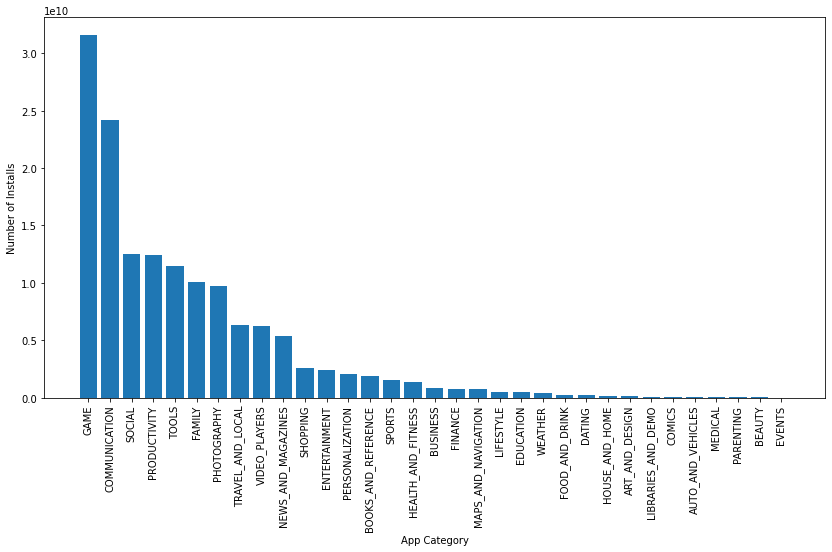

In [18]:
# Plot App Category vs Number of Installs
fig, ax = plt.subplots(figsize = (14,7))
app_category_installs = apps.groupby('Category').sum().sort_values('Installs',ascending=False)
ax.bar(app_category_installs.index,app_category_installs.Installs)
plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Number of Installs')
plt.show()


## 2) What are the top Content rating apps ?

In [19]:
max_rating = apps.groupby('Category')['Rating'].max()
print(max_rating)

Category
ART_AND_DESIGN         5.0
AUTO_AND_VEHICLES      4.9
BEAUTY                 4.9
BOOKS_AND_REFERENCE    5.0
BUSINESS               5.0
COMICS                 5.0
COMMUNICATION          5.0
DATING                 5.0
EDUCATION              4.9
ENTERTAINMENT          4.7
EVENTS                 5.0
FAMILY                 5.0
FINANCE                5.0
FOOD_AND_DRINK         5.0
GAME                   5.0
HEALTH_AND_FITNESS     5.0
HOUSE_AND_HOME         4.8
LIBRARIES_AND_DEMO     5.0
LIFESTYLE              5.0
MAPS_AND_NAVIGATION    4.9
MEDICAL                5.0
NEWS_AND_MAGAZINES     5.0
PARENTING              5.0
PERSONALIZATION        5.0
PHOTOGRAPHY            5.0
PRODUCTIVITY           5.0
SHOPPING               5.0
SOCIAL                 5.0
SPORTS                 5.0
TOOLS                  5.0
TRAVEL_AND_LOCAL       5.0
VIDEO_PLAYERS          4.9
WEATHER                4.8
Name: Rating, dtype: float64


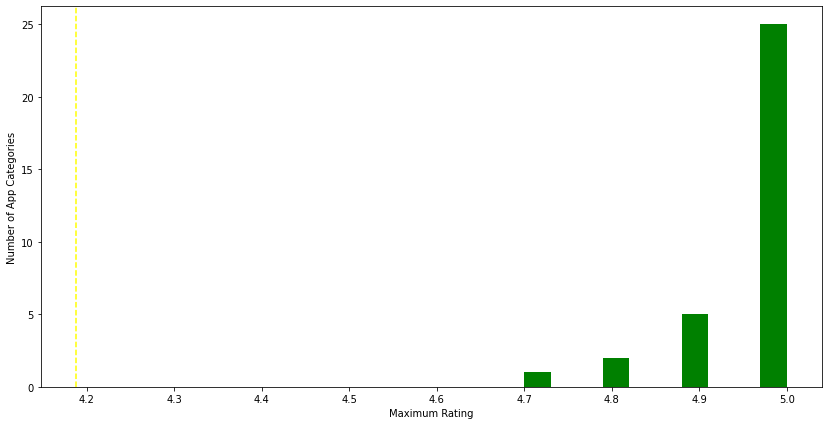

In [20]:
# Plot a histogram for Maximum Rating
fig, max = plt.subplots(figsize = (14,7))
max.hist(max_rating,color='green')
max.axvline(apps['Rating'].mean(),color='yellow',linestyle='--')
plt.xlabel('Maximum Rating')
plt.ylabel('Number of App Categories')
plt.show()

## 3) Visualize the relation between size and rating of the App

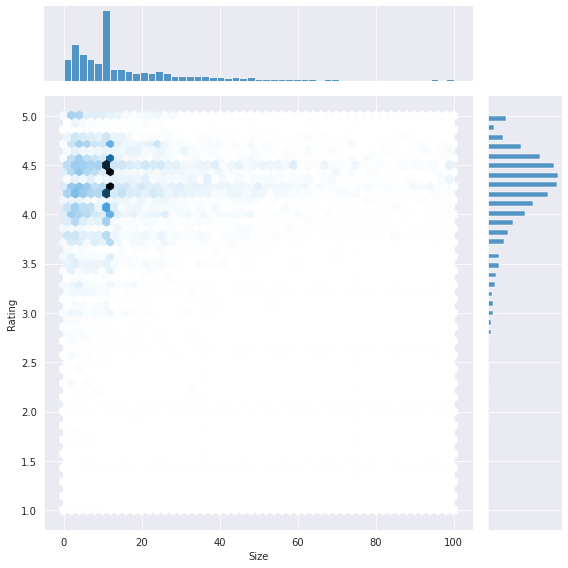

In [21]:
%matplotlib inline
sns.set_style("darkgrid")

sns.jointplot(x = apps['Size'], y = apps['Rating'], height=8, kind='hex')
plt.show()

## 4) Visualize the relation between price and rating of the App

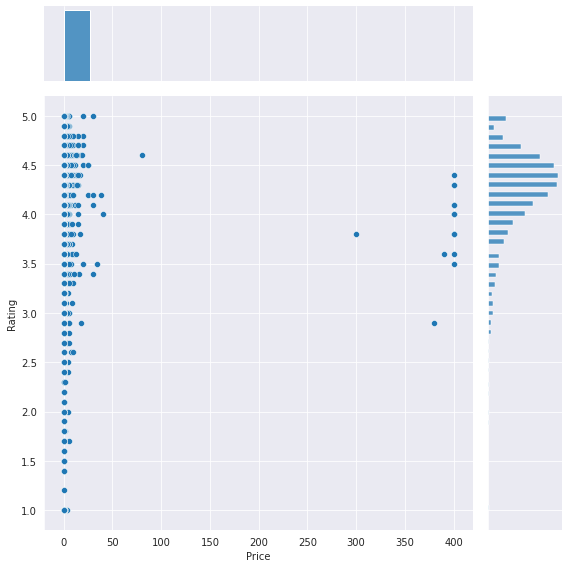

In [22]:
%matplotlib inline

sns.jointplot(x = apps['Price'], y = apps['Rating'], height=8)
plt.show()

## 5) What are the Average App's Rating in each category

In [23]:
avg_rating = apps.groupby('Category')['Rating'].mean()
print(avg_rating)

Category
ART_AND_DESIGN         4.377049
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.347458
BUSINESS               4.102593
COMICS                 4.155172
COMMUNICATION          4.151466
DATING                 3.971698
EDUCATION              4.375969
ENTERTAINMENT          4.136036
EVENTS                 4.435556
FAMILY                 4.191264
FINANCE                4.127445
FOOD_AND_DRINK         4.164151
GAME                   4.281285
HEALTH_AND_FITNESS     4.261450
HOUSE_AND_HOME         4.164706
LIBRARIES_AND_DEMO     4.179688
LIFESTYLE              4.096066
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.182450
NEWS_AND_MAGAZINES     4.128505
PARENTING              4.300000
PERSONALIZATION        4.333117
PHOTOGRAPHY            4.182895
PRODUCTIVITY           4.201796
SHOPPING               4.251485
SOCIAL                 4.254918
SPORTS                 4.225175
TOOLS                  4.047203
TRAVEL_AND_LOCAL       4.094146

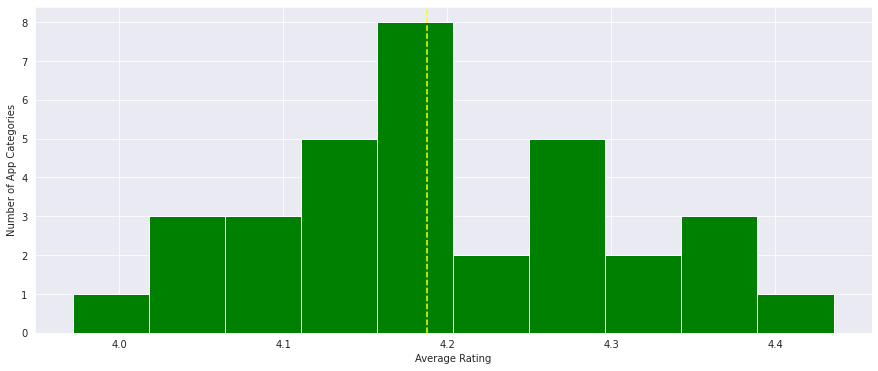

In [24]:
# Plot a histogram for Average Rating
fig, ax = plt.subplots(figsize = (15,6))
ax.hist(avg_rating,color='green')
ax.axvline(apps['Rating'].mean(),color='yellow',linestyle='--')
plt.xlabel('Average Rating')
plt.ylabel('Number of App Categories')
plt.show()

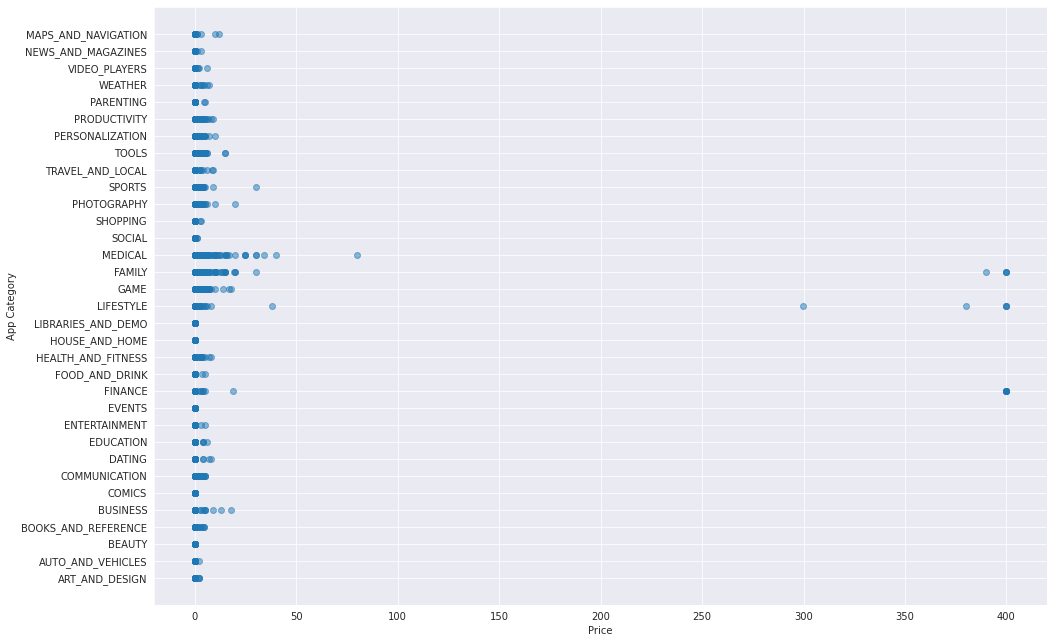

In [25]:
# Plot App Price vs App Category
%matplotlib inline
fig,ax = plt.subplots(figsize=(16,11))

plt.scatter(x=apps['Price'], y=apps['Category'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('App Category')
plt.show()

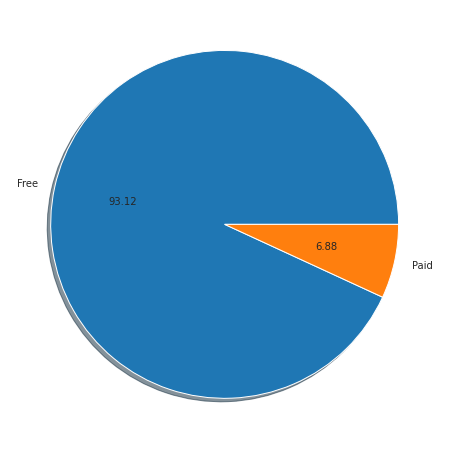

In [26]:
# Plot the popularity of Paid Apps vs Free Apps using pie chart
fig,ax1 = plt.subplots(figsize=(12,8))
freevspaid = apps.groupby('Type').size()
plt.pie(freevspaid,labels=['Free','Paid'],shadow=True,autopct='%.2f')
plt.show()

# User Reviews Analysis :

In [28]:
# Load and clean the User Reviews Dataset
user_reviews_path = pd.read_csv('/content/drive/My Drive/csv files/User Reviews.csv')
user_reviews_path.dropna(inplace=True)

In [29]:
apps = review_path.dropna()
apps = apps.drop_duplicates()

In [30]:
# Merge 'reviews' DataFrame with 'apps' DataFrame. We use inner join to do this operation.
mergedf = pd.merge(apps, user_reviews_path, on='App', how = 'inner')
mergedf.head(5)

,App,Translated_Review_x,Sentiment_x,Sentiment_Polarity_x,Sentiment_Subjectivity_x,Translated_Review_y,Sentiment_y,Sentiment_Polarity_y,Sentiment_Subjectivity_y
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333,Best way,Positive,1.00,0.300000


In [31]:
#print summary of the merged Dataframe
mergedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1801745 entries, 0 to 1801744
Data columns (total 9 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   App                       object 
 1   Translated_Review_x       object 
 2   Sentiment_x               object 
 3   Sentiment_Polarity_x      float64
 4   Sentiment_Subjectivity_x  float64
 5   Translated_Review_y       object 
 6   Sentiment_y               object 
 7   Sentiment_Polarity_y      float64
 8   Sentiment_Subjectivity_y  float64
dtypes: float64(4), object(5)
memory usage: 137.5+ MB


Sentiment_y
Positive    1152750
Negative     430305
Neutral      218690
dtype: int64


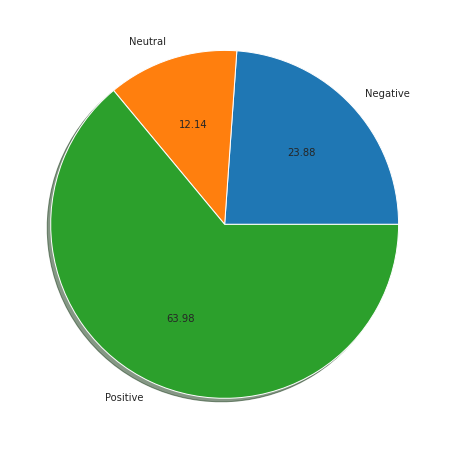

In [32]:
# Explore Composition of the total reviews
print(mergedf.value_counts('Sentiment_y'))

# Visualize the composition through a pie chart
fig,ax1 = plt.subplots(figsize=(12,8))
sentiments = mergedf.groupby('Sentiment_y').size()
plt.pie(sentiments,labels=['Negative','Neutral','Positive'],shadow=True,autopct='%.2f')
plt.show()

In [33]:
# First 5 rows of datasets
review_path.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [34]:
# find out the nan values in review path dataset  
print(review_path.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [35]:
# drop the nan values by using the dropna method
review = review_path.dropna()
review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [36]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
review ["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in review["Translated_Review"]]
review ["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in review["Translated_Review"]]
review ["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in review["Translated_Review"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [39]:
print(review_path.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


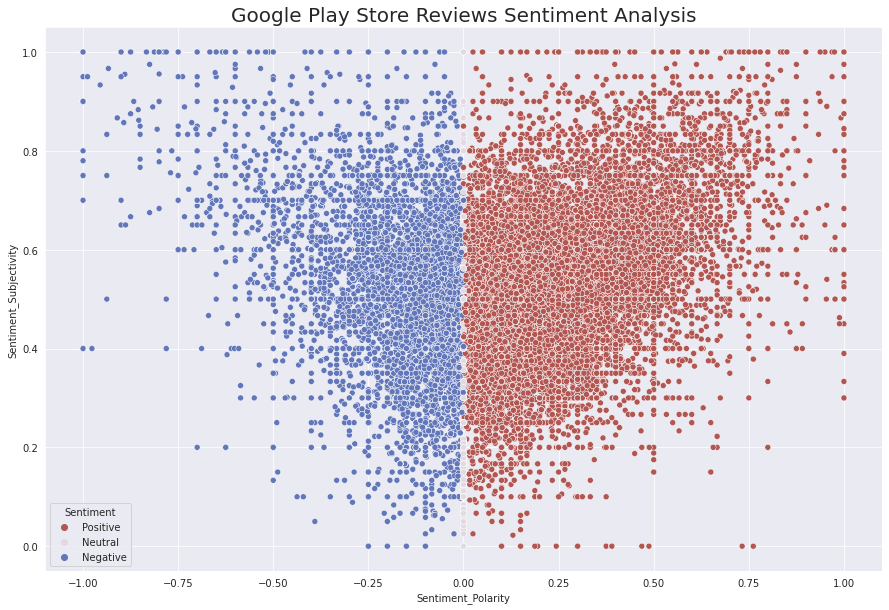

In [40]:
# scatterplot of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(15, 10))
sns.scatterplot(review['Sentiment_Polarity'], review['Sentiment_Subjectivity'], 
                hue = review['Sentiment'], edgecolor='white', palette="twilight_shifted_r")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

# Conclusion :
## Hence, from the above observations and visualizations, we can draw the following conclusions :


## *  The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize th product.

## *  The most popular App Category is "Game".

## *   A large number of Apps fall into "Family" Category i.e., this is the category with highest number of subsequent apps.


## *   The total average rating of Play Store Apps is [4.18].

## *   The App Categories with least and highest average ratings are "Dating" and "Events" respectively.

## *   We deal with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables.That's a lot of work that python helped us make easier.

## *   Free apps are highly popular when compared to Paid apps.